In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trnx=pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
trnx

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
respns=pd.read_csv('Retail_data_response.csv')

In [5]:
respns

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df=trnx.merge(respns, on='customer_id', how='left')

In [7]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [8]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [9]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [10]:
df.columns

Index(['customer_id', 'trans_date', 'tran_amount', 'response'], dtype='object')

In [11]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [12]:
df.shape

(125000, 4)

In [13]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [15]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [16]:
df.dropna()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [26]:
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response'] = df['response'].fillna(0).astype('int64')

In [27]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [28]:
set(df['response'])

{0, 1}

In [29]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [30]:
z_score=np.abs(stats.zscore(df['tran_amount']))

threshold=3

outliers=z_score>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [31]:
z_score=np.abs(stats.zscore(df['response']))

threshold=3

outliers=z_score>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


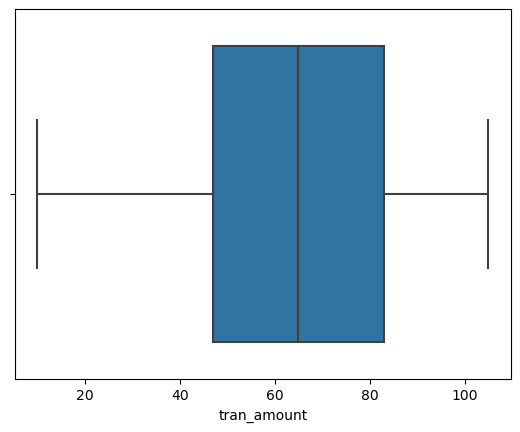

In [32]:
sns.boxplot(x=df['tran_amount'])
plt.show()

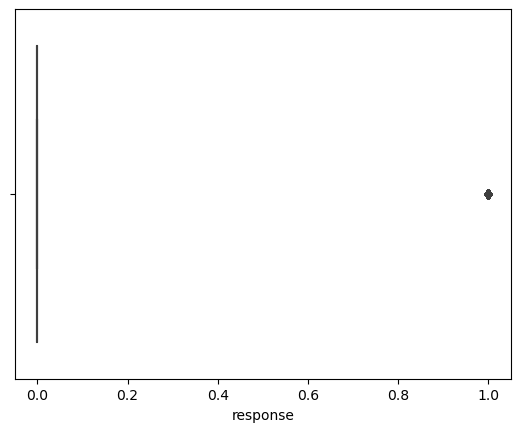

In [33]:
sns.boxplot(x=df['response'])
plt.show()

In [34]:
df['month']=df['trans_date'].dt.month

In [35]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [36]:
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(12)
monthly_sales

,month,tran_amount
0,8,726921
1,10,725320
2,1,724107
3,7,717223
4,12,709964
5,11,698273
6,6,697014
7,9,694433
8,2,645154
9,3,636577


In [37]:
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts

,index,customer_id
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35
...,...,...
6884,CS8559,4
6885,CS7716,4
6886,CS8376,4
6887,CS7224,4


In [38]:
customer_counts.columns=['customer_id','count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35
...,...,...
6884,CS8559,4
6885,CS7716,4
6886,CS8376,4
6887,CS7224,4


In [39]:
# top 5 customers

top_5_customers=customer_counts.sort_values(by='count', ascending=False).head()
top_5_customers

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35


<Axes: xlabel='customer_id', ylabel='count'>

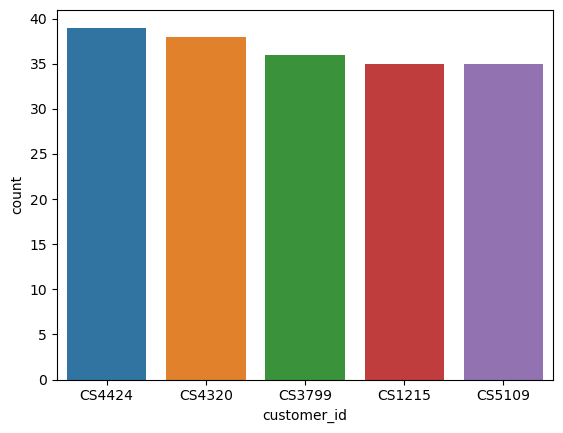

In [40]:
sns.barplot(x='customer_id', y='count', data=top_5_customers)

In [41]:
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6884,CS8996,582
6885,CS8997,543
6886,CS8998,624
6887,CS8999,383


In [42]:
# top 5 sales

top_5_sales=customer_sales.sort_values(by='tran_amount', ascending=False).head()
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

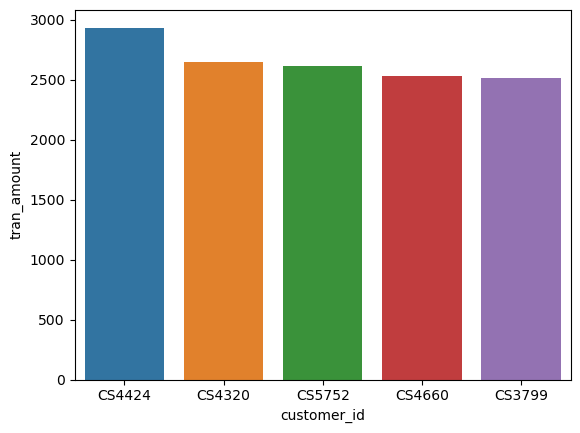

In [43]:
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales)

# time series

In [51]:
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()


In [50]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [52]:
monthly_sales.index=monthly_sales.index.to_timestamp()

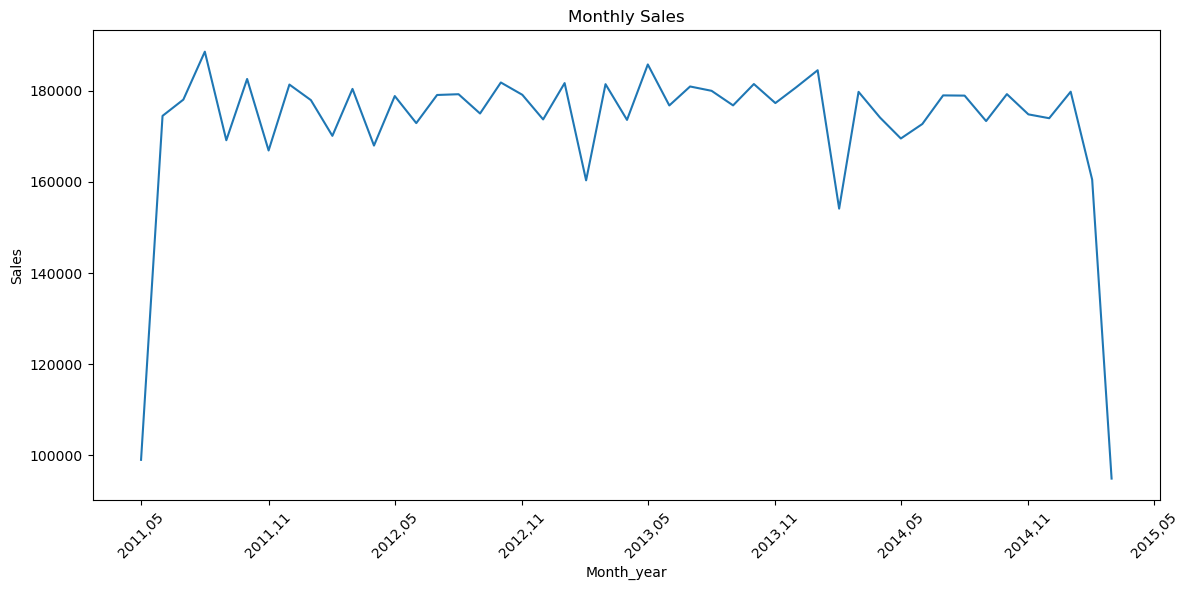

In [56]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y,%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month_year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# cohort segmentation

In [57]:
# recency

recency=df.groupby('customer_id')['trans_date'].max()

# frequency

frequency=df.groupby('customer_id')['trans_date'].count()

# monetary

monetary=df.groupby('customer_id')['tran_amount'].sum()

# combine

rfn=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})

In [58]:
rfn

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [59]:
# customer_segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<row['monetary']<1000):
        return 'P1'
    else:
        return 'P2'
    
rfn['segment']=rfn.apply(segment_customer, axis=1)    

In [60]:
rfn

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# churn analysis

<Axes: >

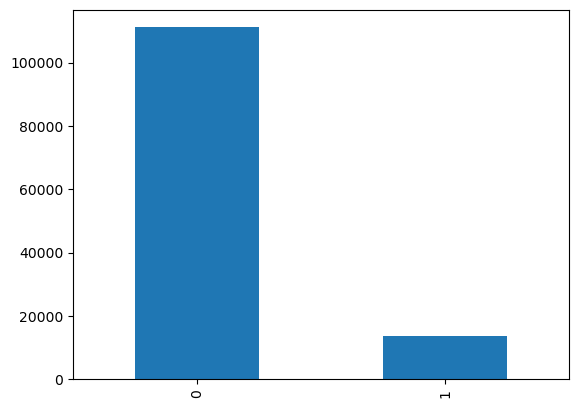

In [61]:
# churned and active customers

churn_counts=df['response'].value_counts()

#plot

churn_counts.plot(kind='bar')

# analysis top customers

<Axes: xlabel='month_year'>

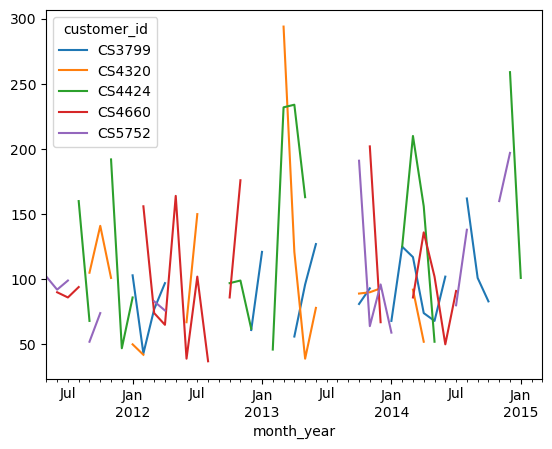

In [62]:
top_5_customers=monetary.sort_values(ascending=False).head().index

top_customers=df[df['customer_id'].isin(top_5_customers)]

top_customers_sales=top_customers.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

In [63]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [64]:
df.to_csv('MainData.csv')

In [65]:
rfn.to_csv('AddAnlys.csv')

In [68]:
data1=pd.read_csv('MainData.csv')

In [69]:
data1

,Unnamed: 0,customer_id,trans_date,tran_amount,response,month,month_year
0,0,CS5295,2013-02-11,35,1,2,2013-02
1,1,CS4768,2015-03-15,39,1,3,2015-03
2,2,CS2122,2013-02-26,52,0,2,2013-02
3,3,CS1217,2011-11-16,99,0,11,2011-11
4,4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...,...
124995,124995,CS8433,2011-06-26,64,0,6,2011-06
124996,124996,CS7232,2014-08-19,38,0,8,2014-08
124997,124997,CS8731,2014-11-28,42,0,11,2014-11
124998,124998,CS8133,2013-12-14,13,0,12,2013-12


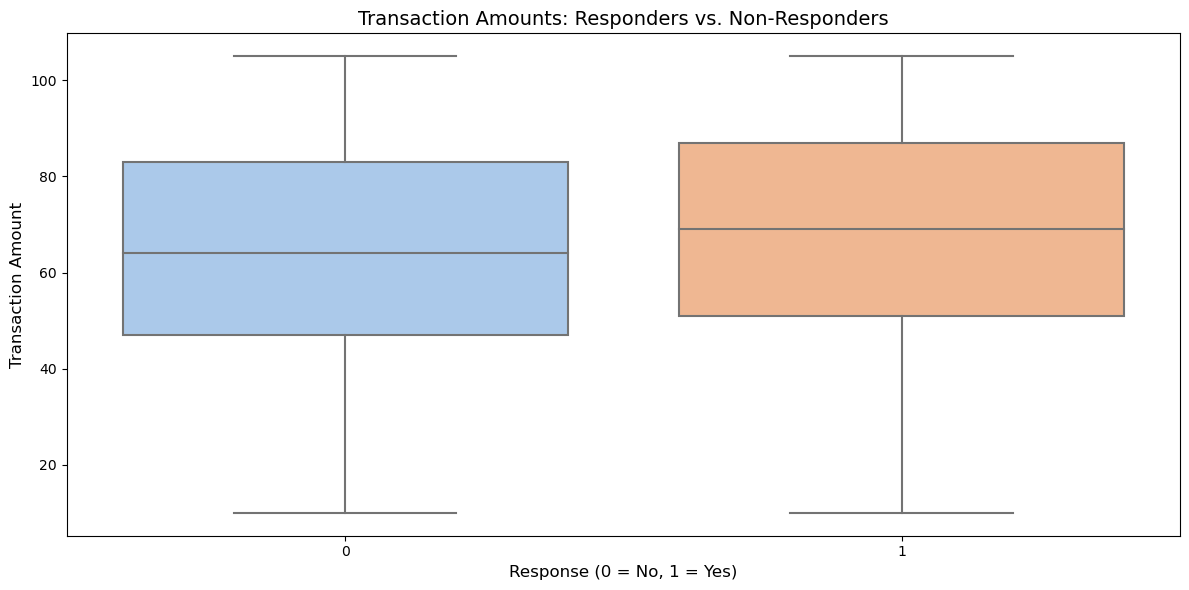

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='response', y='tran_amount', data=data1, palette='pastel')
plt.title('Transaction Amounts: Responders vs. Non-Responders', fontsize=14)
plt.xlabel('Response (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

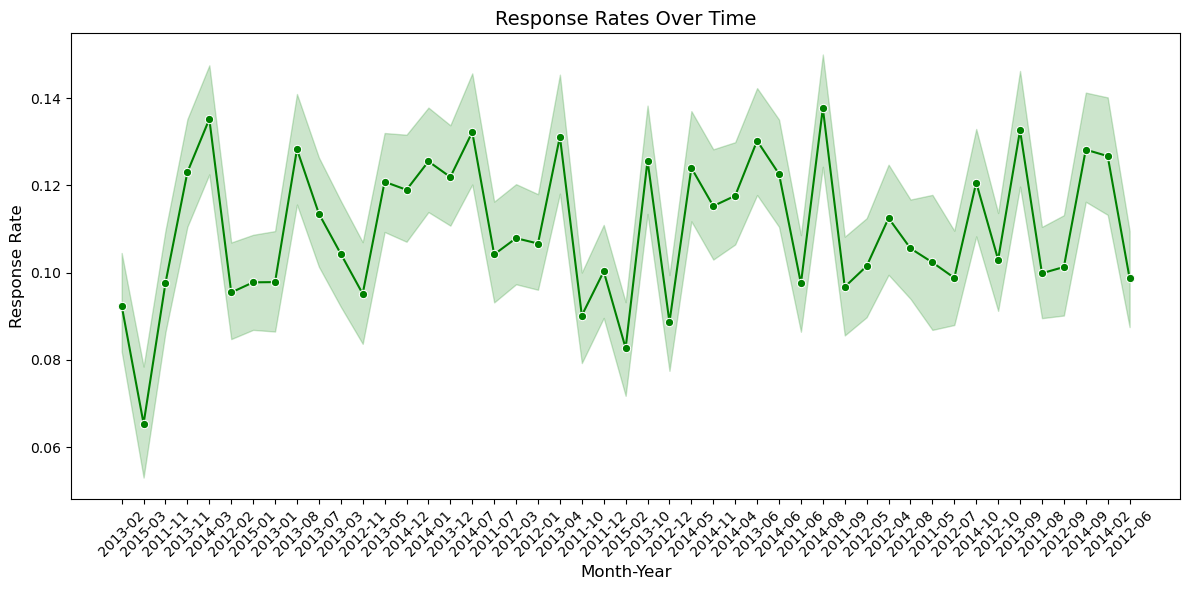

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='response', data=data1, marker='o', color='green')
plt.title('Response Rates Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Response Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
data2=pd.read_csv('AddAnlys.csv')

In [74]:
data2

,customer_id,recency,frequency,monetary,segment
0,CS1112,2015-01-14,15,1012,P0
1,CS1113,2015-02-09,20,1490,P0
2,CS1114,2015-02-12,19,1432,P0
3,CS1115,2015-03-05,22,1659,P0
4,CS1116,2014-08-25,13,857,P2
...,...,...,...,...,...
6884,CS8996,2014-12-09,13,582,P2
6885,CS8997,2014-06-28,14,543,P2
6886,CS8998,2014-12-22,13,624,P2
6887,CS8999,2014-07-02,12,383,P2


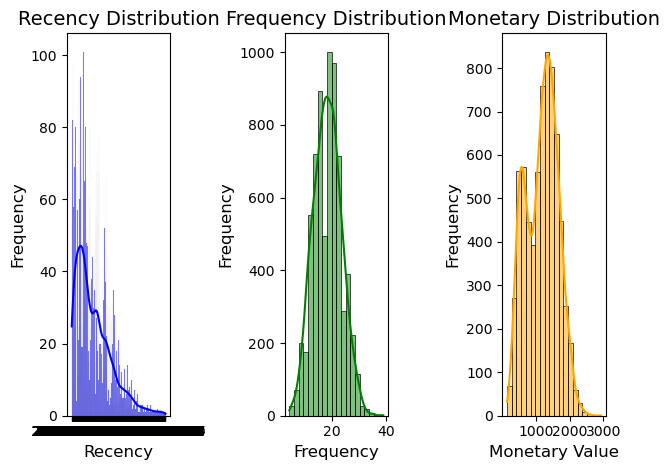

In [76]:
# Recency
plt.subplot(1, 3, 1)
sns.histplot(data2['recency'], kde=True, color='blue', bins=20)
plt.title('Recency Distribution', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(data2['frequency'], kde=True, color='green', bins=20)
plt.title('Frequency Distribution', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(data2['monetary'], kde=True, color='orange', bins=20)
plt.title('Monetary Distribution', fontsize=14)
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()



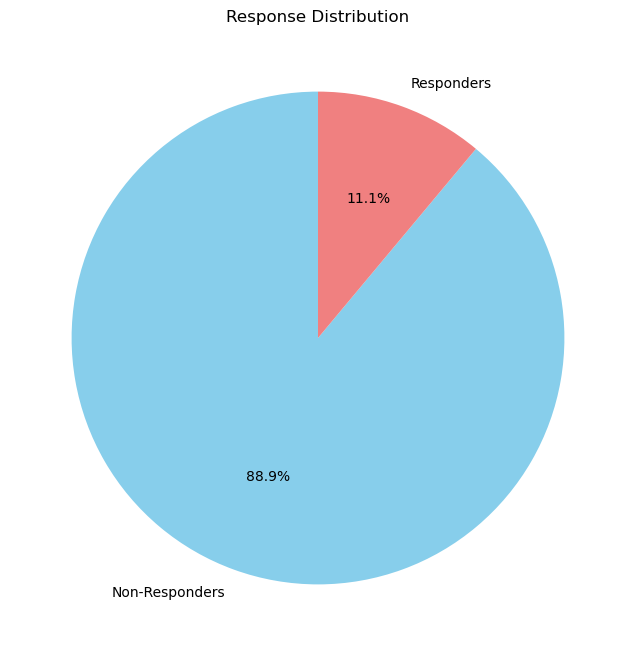

In [78]:
plt.figure(figsize=(8, 8))
response_counts =data1['response'].value_counts()
plt.pie(response_counts, labels=['Non-Responders', 'Responders'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Response Distribution')
plt.show()

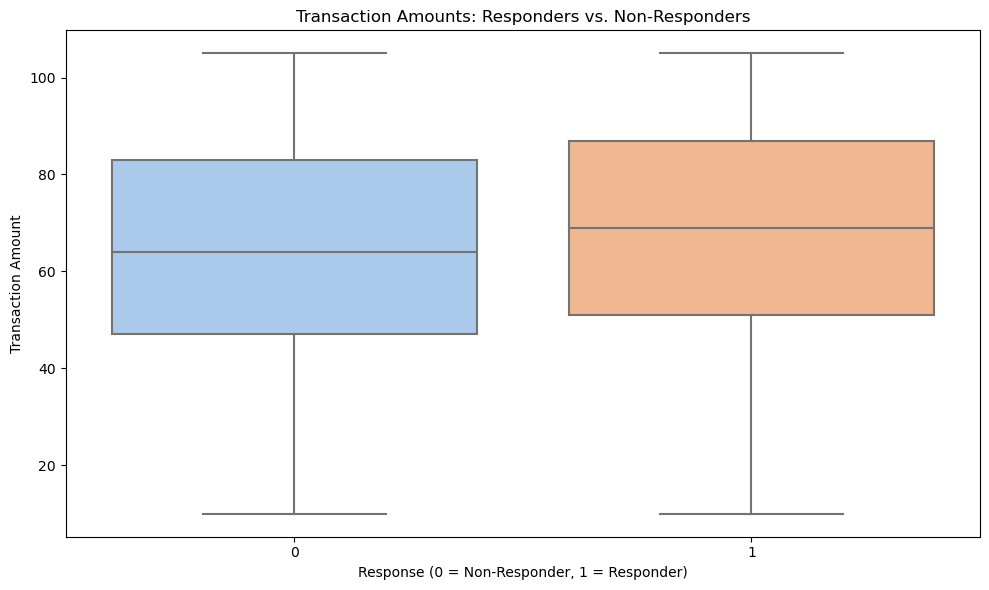

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='tran_amount', data=data1, palette='pastel')
plt.title('Transaction Amounts: Responders vs. Non-Responders')
plt.xlabel('Response (0 = Non-Responder, 1 = Responder)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

In [80]:
data2=pd.read_csv('AddAnlys.csv')

In [81]:
data2

,customer_id,recency,frequency,monetary,segment
0,CS1112,2015-01-14,15,1012,P0
1,CS1113,2015-02-09,20,1490,P0
2,CS1114,2015-02-12,19,1432,P0
3,CS1115,2015-03-05,22,1659,P0
4,CS1116,2014-08-25,13,857,P2
...,...,...,...,...,...
6884,CS8996,2014-12-09,13,582,P2
6885,CS8997,2014-06-28,14,543,P2
6886,CS8998,2014-12-22,13,624,P2
6887,CS8999,2014-07-02,12,383,P2


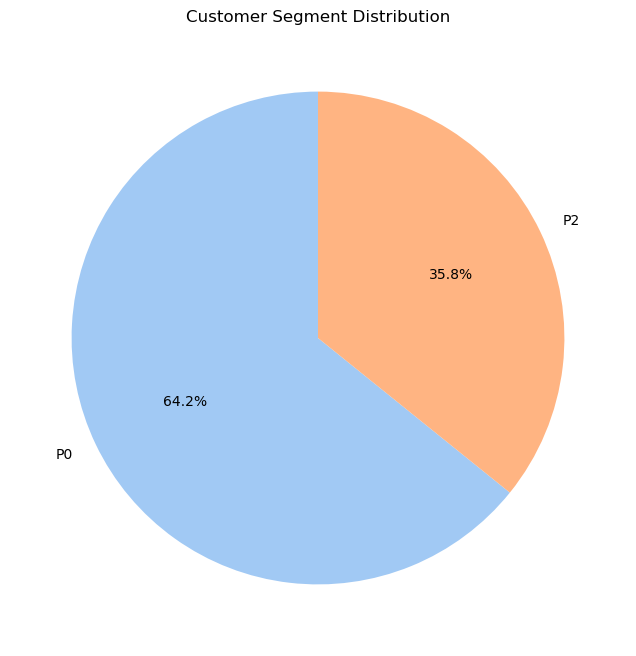

In [82]:
plt.figure(figsize=(8, 8))
segment_counts =data2['segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Segment Distribution')
plt.show()

In [101]:
data2['recency'] = pd.to_datetime(data2['recency'], errors='coerce')

In [102]:
reference_date = data2['recency'].max()
print("Reference Date:", reference_date)

Reference Date: NaT


In [103]:
data2['recency_days'] = (reference_date - data2['recency']).dt.days

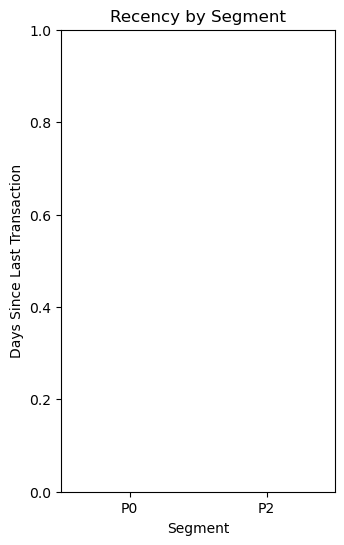

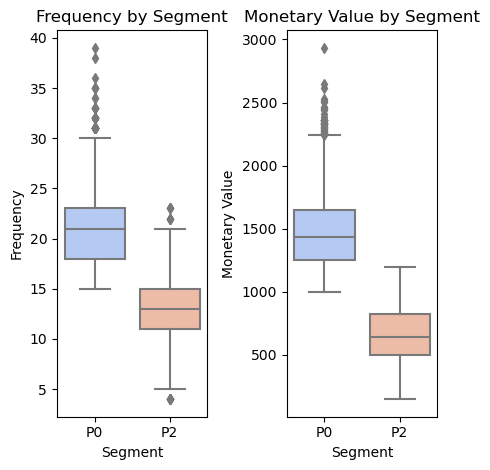

In [104]:
plt.figure(figsize=(12, 6))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='segment', y='recency_days', data=data2, palette='coolwarm')
plt.title('Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Days Since Last Transaction')
plt.show()



# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='segment', y='frequency', data=data2, palette='coolwarm')
plt.title('Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Frequency')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='segment', y='monetary', data=data2, palette='coolwarm')
plt.title('Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary Value')

plt.tight_layout()
plt.show()

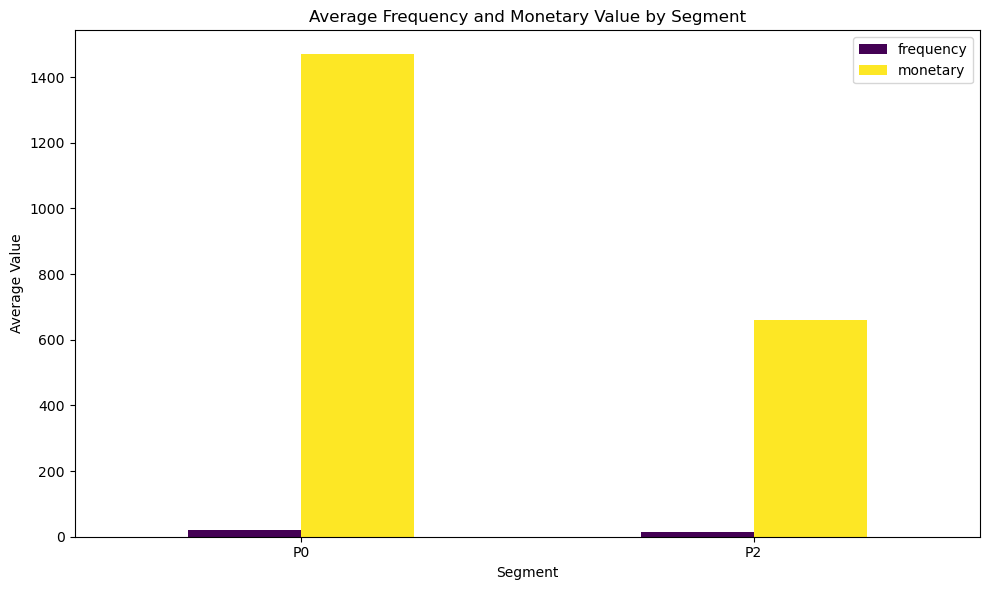

In [105]:
rfm_summary = data2.groupby('segment')[['frequency', 'monetary']].mean()
rfm_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Frequency and Monetary Value by Segment')
plt.ylabel('Average Value')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


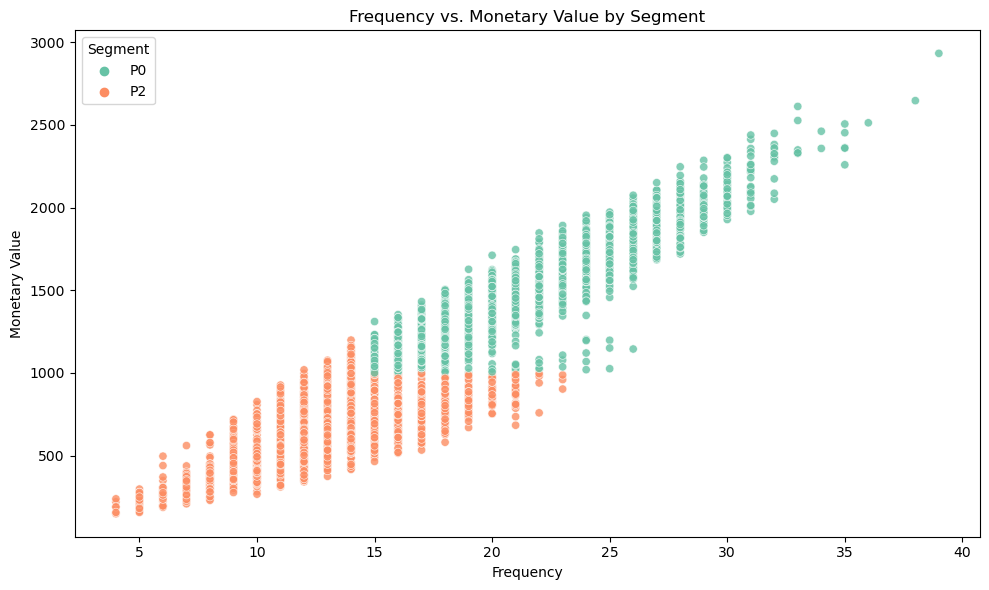

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='frequency', y='monetary', hue='segment', palette='Set2', alpha=0.8)
plt.title('Frequency vs. Monetary Value by Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

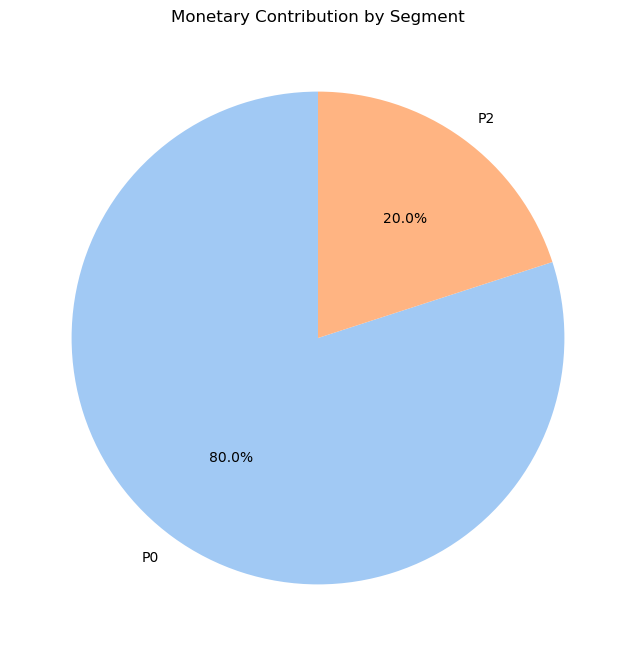

In [107]:
segment_monetary = data2.groupby('segment')['monetary'].sum()
plt.figure(figsize=(8, 8))
plt.pie(segment_monetary, labels=segment_monetary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Monetary Contribution by Segment')
plt.show()